共轭梯度算法描述：  
(1)给定迭代精度$0\leq\epsilon\ll1$和初始点$x_0$。计算$g_0=\triangledown f(x_0)$.令$k\leftarrow 0$。  
(2)若$\parallel g_k\parallel\leq\epsilon$，停止迭代，输出$x^*\approx x_k$。  
(3)计算搜索方向$d_k$  
$$ f(x)=\left\{
\begin{array}{rcl}
-g_k       &      & {k=0}\\
-g_k +\beta_{k-1}d_{k-1}     &      & {k\geq1}
\end{array} \right. $$
(4)利用线性搜索方法确定搜索步长$\alpha_k$  
(5)令$x_{k+1}\leftarrow x_k+\alpha_kd_k$，并计算$g_{k+1}=\triangledown f(x_{x+1})$  
(6)$k\leftarrow k+1$，转(2)

In [1]:
# 导入必要的包
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
def goldsteinsearch(f, df, d, x, alpham, rho, t):
    '''
    线性搜索子函数数f，导数df
    当前迭代点x和当前搜索方向d，t试探系数>1
    '''
    flag = 0

    a = 0
    b = alpham
    fk = f(x)
    gk = df(x)

    phi0 = fk
    dphi0 = np.dot(gk, d)
    alpha = b*random.uniform(0, 1)

    while(flag == 0):
        newfk = f(x + alpha * d)
        phi = newfk
        # print(phi,phi0,rho,alpha ,dphi0)
        if (phi - phi0) <= (rho * alpha * dphi0):
            if (phi - phi0) >= ((1 - rho) * alpha * dphi0):
                flag = 1
            else:
                a = alpha
                b = b
                if (b < alpham):
                    alpha = (a + b) / 2
                else:
                    alpha = t * alpha
        else:
            a = a
            b = alpha
            alpha = (a + b) / 2
    return alpha


def Wolfesearch(f, df, d, x, alpham, rho, t):
    '''
    线性搜索子函数数f，导数df
    当前迭代点x和当前搜索方向d
    σ∈(ρ,1)=0.75
    '''
    sigma = 0.75

    flag = 0

    a = 0
    b = alpham
    fk = f(x)
    gk = df(x)

    phi0 = fk
    dphi0 = np.dot(gk, d)
    alpha = b*random.uniform(0, 1)

    while(flag == 0):
        newfk = f(x + alpha * d)
        phi = newfk
        # print(phi,phi0,rho,alpha ,dphi0)
        if (phi - phi0) <= (rho * alpha * dphi0):
            # if abs(np.dot(df(x + alpha * d),d))<=-sigma*dphi0:
            if (phi - phi0) >= ((1 - rho) * alpha * dphi0):
                flag = 1
            else:
                a = alpha
                b = b
                if (b < alpham):
                    alpha = (a + b) / 2
                else:
                    alpha = t * alpha
        else:
            a = a
            b = alpha
            alpha = (a + b) / 2
    return alpha


def frcg(fun, gfun, x0):

    # x0是初始点，fun和gfun分别是目标函数和梯度
    # x,val分别是近似最优点和最优值，k是迭代次数
    # dk是搜索方向，gk是梯度方向
    # epsilon是预设精度，np.linalg.norm(gk)求取向量的二范数
    maxk = 5000
    rho = 0.6
    sigma = 0.4
    k = 0
    epsilon = 1e-5
    n = np.shape(x0)[0]
    itern = 0
    W = np.zeros((2, 20000))

    f = open("共轭.txt", 'w')

    while k < maxk:
        W[:, k] = x0
        gk = gfun(x0)
        itern += 1
        itern %= n
        if itern == 1:
            dk = -gk
        else:
            beta = 1.0 * np.dot(gk, gk) / np.dot(g0, g0)
            dk = -gk + beta * d0
            gd = np.dot(gk, dk)
            if gd >= 0.0:
                dk = -gk
        if np.linalg.norm(gk) < epsilon:
            break

        alpha = goldsteinsearch(fun, gfun, dk, x0, 1, 0.1, 2)
        # alpha=Wolfesearch(fun,gfun,dk,x0,1,0.1,2)
        x0 += alpha*dk

        f.write(str(k)+' '+str(np.linalg.norm(gk))+"\n")
        print(k, alpha)
        g0 = gk
        d0 = dk
        k += 1

    W = W[:, 0:k+1]  # 记录迭代点
    return [x0, fun(x0), k, W]

def fun(x):
    return 100 * (x[1] - x[0] ** 2) ** 2 + (1 - x[0]) ** 2

def gfun(x):
    return np.array([-400 * x[0] * (x[1] - x[0] ** 2) - 2 * (1 - x[0]), 200 * (x[1] - x[0] ** 2)])

0 0.0010329771017985256
1 0.0014492629198866354
2 0.0010819772640809555
3 0.3262350673428045
4 0.002088585649731792
5 0.00407544943772309
6 0.00290525977288017
7 0.026060315968428702
8 0.0032655973585066587
9 0.019082941454998774
10 0.0031844514647937257
11 0.018580103032765985
12 0.0036354720789079746
13 0.015493874088956477
14 0.002606535794780674
15 0.10948617798708105
16 0.003465730774696925
17 0.17359624991601702
18 0.0060066274808029275
19 0.014955758483558948
20 0.009055535788066754
21 0.06271097771351783
22 0.004888108323232831
23 0.006900395011698899
24 0.04281839789716002
25 0.019812729780227203
26 0.001928489578856999
27 0.0047188795073539545
28 0.00311057286333222
29 0.08484404925970657
30 0.002959709613815945
31 0.00895477807145087
32 0.002943553124306518
33 0.03027321408831008
34 0.0018420264956256593
35 0.020306981503523988
36 0.0024096584042956476
37 0.015244984359498902
38 0.0030570235655822376
39 0.024365682166430924
40 0.0016789206566112948
41 0.31181126687653615
42 

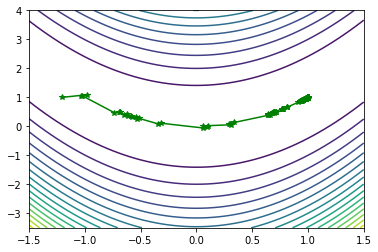

In [3]:
if __name__ == "__main__":
    X1 = np.arange(-1.5, 1.5 + 0.05, 0.05)
    X2 = np.arange(-3.5, 4 + 0.05, 0.05)
    [x1, x2] = np.meshgrid(X1, X2)
    f = 100 * (x2 - x1 ** 2) ** 2 + (1 - x1) ** 2  # 给定的函数
    plt.contour(x1, x2, f, 20)  # 画出函数的20条轮廓线

    x0 = np.array([-1.2, 1])
    x = frcg(fun, gfun, x0)
    print(x[0], x[2])
    W = x[3]
    plt.plot(W[0, :], W[1, :], 'g*-')  # 画出迭代点收敛的轨迹
    plt.show()